# Analays Data Science Job Demand

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset


# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Creating a Pivot Table for Job Postings in the US

In [ ]:
# Filter job postings for the United States and create a copy
df_US = df[df['job_country'] == 'United States'].copy()

# Extract the full month name from the job posting date
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

# Create a pivot table with months as rows and job titles as columns, counting occurrences
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

# Display the pivot table
df_US_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


## Sorting Job Postings by Month in Chronological Order

In [ ]:
# Reset index to make 'job_posted_month' a column
df_US_pivot.reset_index(inplace=True)

# Convert month names to numerical values for sorting
df_US_pivot['job_month'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month

# Sort DataFrame by numerical month values
df_US_pivot.sort_values(by='job_month', inplace=True)

# Set the index back to 'job_posted_month' (month names)
df_US_pivot.set_index('job_posted_month', inplace=True)

# Remove the temporary numerical month column
df_US_pivot.drop(columns='job_month', inplace=True)

# Display the updated DataFrame
df_US_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

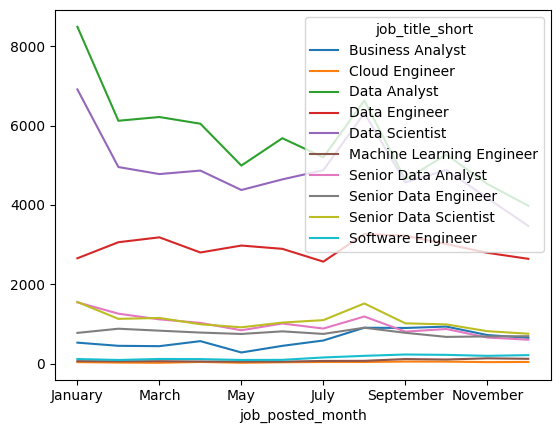

In [6]:
df_US_pivot.plot(kind='line')

## Visualizing Monthly Job Postings for the Top 3 Data Jobs in the US

<function matplotlib.pyplot.show(close=None, block=None)>

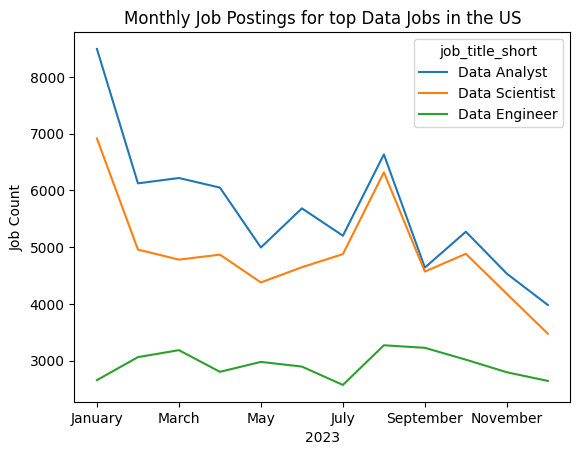

In [ ]:
# Identify the top 3 most common job titles in the US job postings dataset
data_jobs = df_US['job_title_short'].value_counts().head(3).index.to_list()

# Filter the pivot table to include only the top 3 job titles
df_US_pivot = df_US_pivot[data_jobs]

# Plot the trend of job postings over time
df_US_pivot.plot(kind='line')

# Add a title and labels to the plot
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')  # X-axis represents months in 2023
plt.ylabel('Job Count')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()
